In [1]:
from prody import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

### Importation of PMF Data

In [2]:
pmf_data = np.loadtxt('apo_l_meta1.pmf')
dihedrals = pmf_data[:,0]
distances = pmf_data[:,1]
energy = pmf_data[:,2]
np.shape(energy)

(972,)

In [3]:
pmf_data_p = np.loadtxt('apo_p_meta1.pmf')
dihedrals_p = pmf_data_p[:,0]
distances_p = pmf_data_p[:,1]
energy_p = pmf_data_p[:,2]
np.shape(energy)

(972,)

#### Data Implementation
X axis will be dihedrals, Y axis is setted as distances and Z axis is energy

In [4]:
X = -dihedrals #Because our dihedrals are opposite
Y = distances
Z_energy = energy

In [5]:
X_p = -dihedrals_p #Because our dihedrals are opposite
Y_p = distances_p
Z_p = energy_p

In [6]:
for i in range(len(Z_energy)):
    Z_energy[i] -= 20

In [7]:
# Reshape X, Y, and Z_energy into 2D arrays
X_2D = X.reshape(-1,(len(set(Y))))
Y_2D = Y.reshape((len(set(X)), -1))
Z_energy_2D = Z_energy.reshape((len(set(X))),(len(set(Y))))

In [8]:
# Reshape X, Y, and Z_energy into 2D arrays
X_2D_p = X_p.reshape(-1,(len(set(Y_p))))
Y_2D_p = Y_p.reshape((len(set(X_p)), -1))
Z_2D_p = Z_p.reshape((len(set(X_p))),(len(set(Y_p))))

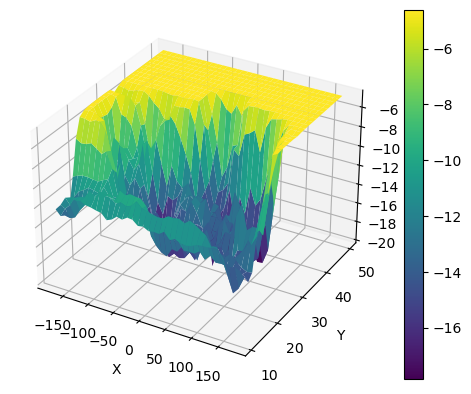

In [9]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X_2D, Y_2D, Z_energy_2D, cmap='viridis')

# Add labels and a colorbar
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z Energy')
fig.colorbar(surf)

# Show the plot
plt.show()

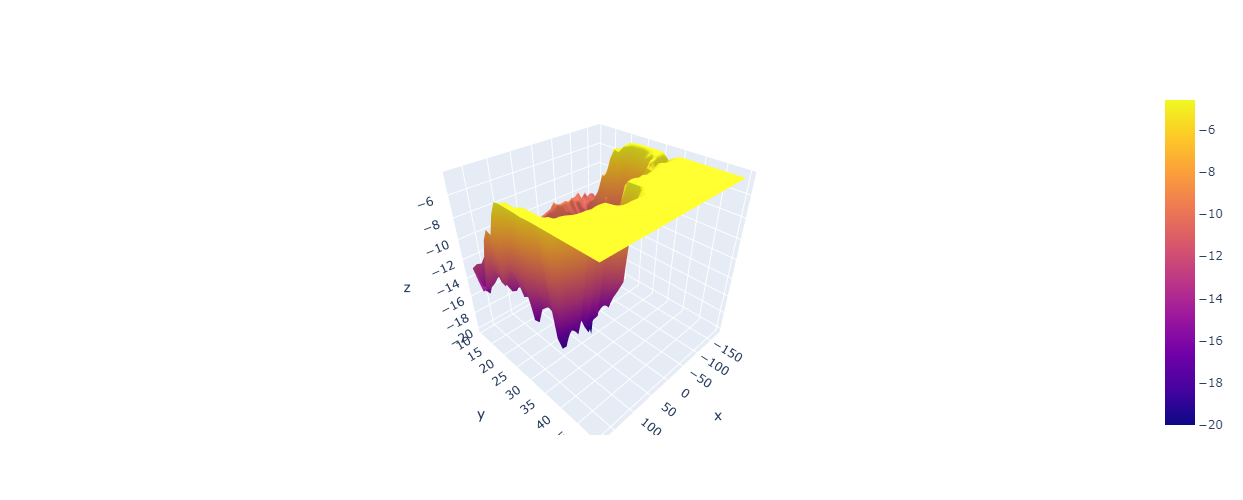

In [10]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z= Z_energy_2D, x=X_2D, y=Y_2D)],)
fig.update_layout(autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

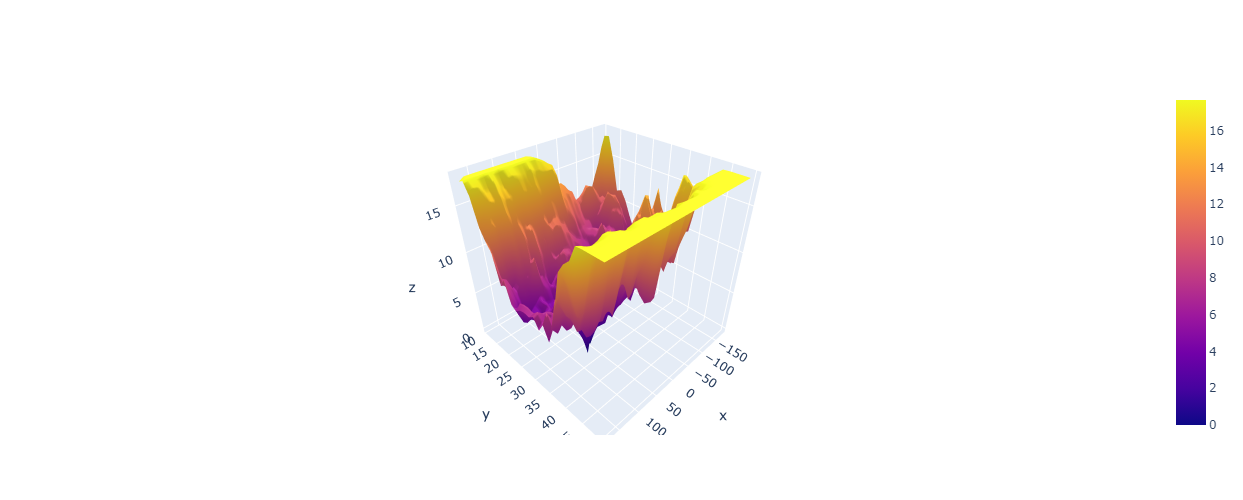

In [11]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z= Z_2D_p, x=X_2D_p, y=Y_2D_p)],)
fig.update_layout(autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

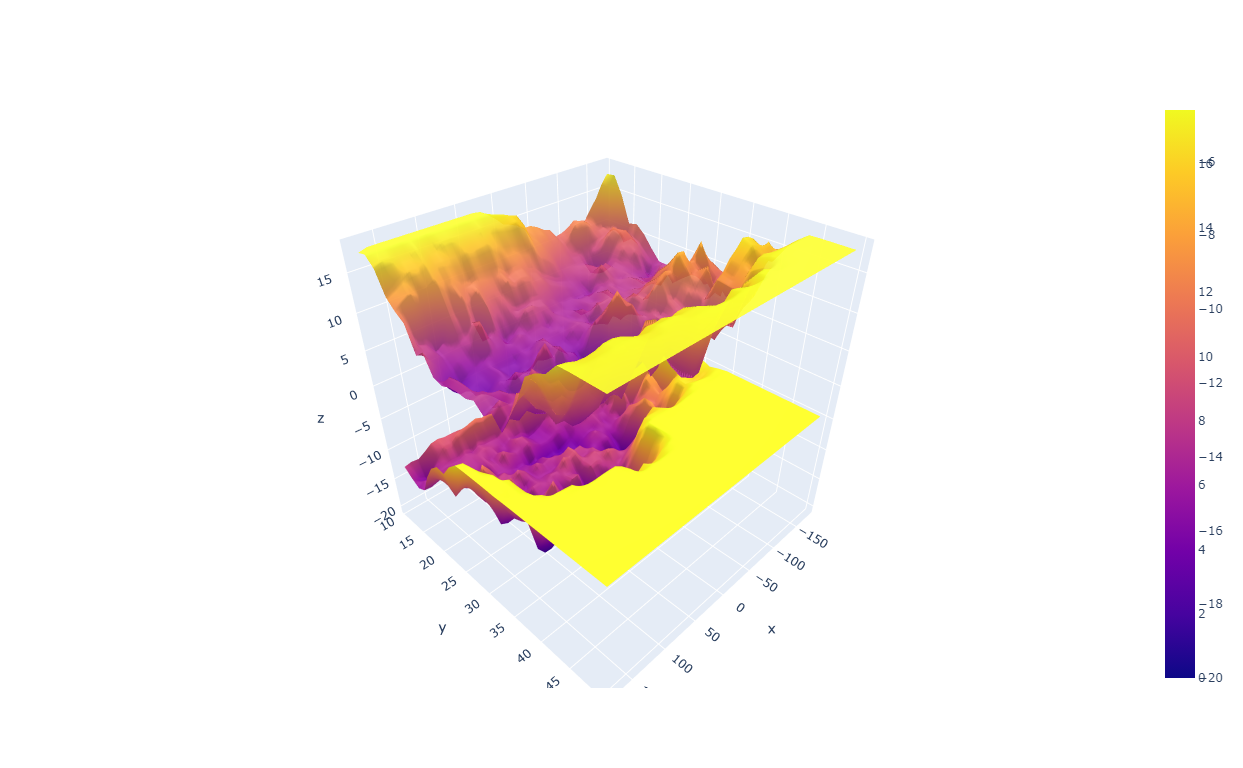

In [12]:
fig = go.Figure(data=[
    go.Surface(z=Z_energy_2D, x=X_2D, y=Y_2D),
    go.Surface(z=Z_2D_p, x=X_2D_p, y=Y_2D_p, showscale=True, opacity=0.9),
])
fig.update_layout(width=1024, height=768) 
fig.show()

### To Remove unnecessary part(yellow part), we can change the range of this plot:

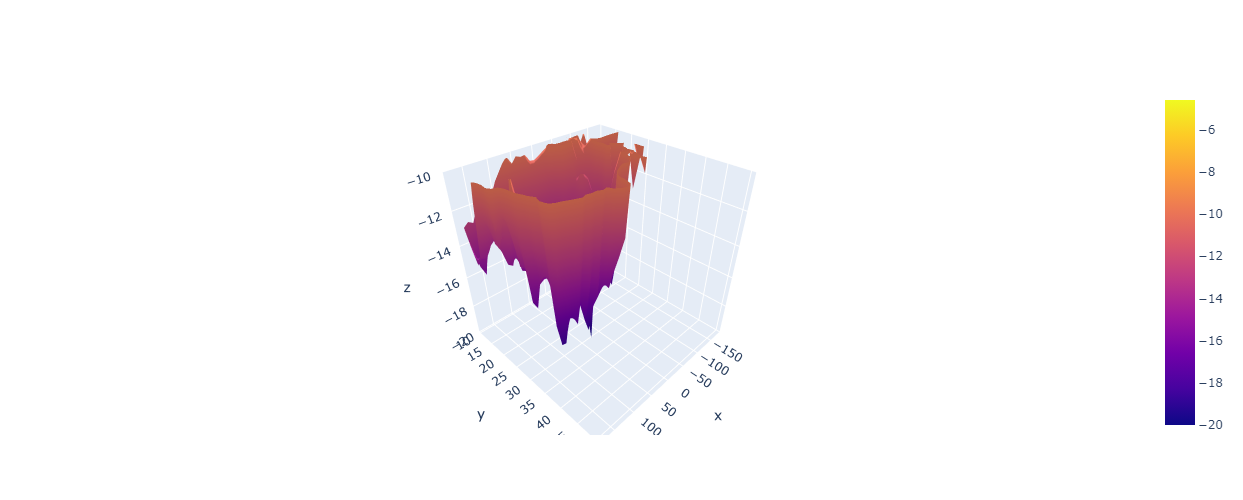

In [13]:

fig = go.Figure(data=[go.Surface(z=Z_energy_2D, x=X_2D, y=Y_2D)])

# Update layout to set the Z axis range
fig.update_layout(
    scene=dict(
        zaxis=dict(range=[-20, -10])  # Update this range as needed
    ),
    autosize=False,
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Show the plot
fig.show()

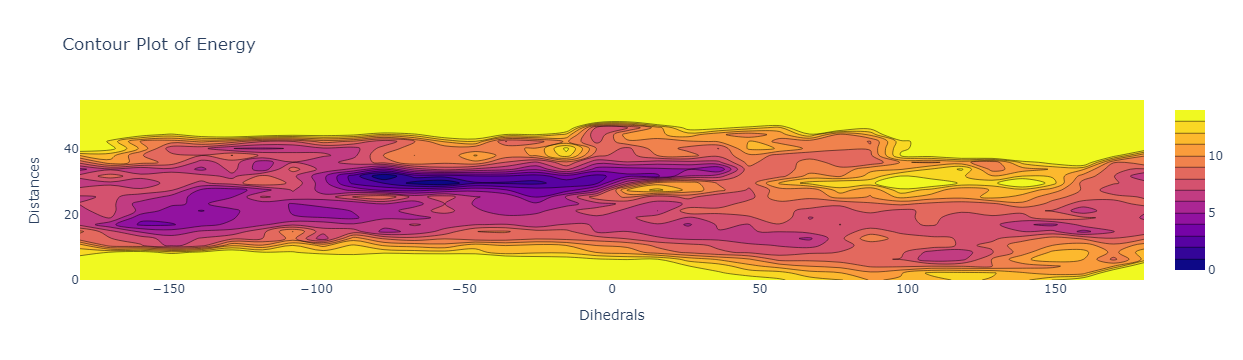

In [14]:
Z_2D_p = Z_2D_p.T  
x_range = np.linspace(-180, 180, Z_2D_p.shape[1])
y_range = np.linspace(0, 55, Z_2D_p.shape[0])   


fig = go.Figure(data =
    go.Contour(
        z=Z_2D_p,
        x=x_range,
        y=y_range,   
        zmin=0,   
        zmax=14 
    )
)


fig.update_layout(
    title="Contour Plot of Energy",
    xaxis_title="Dihedrals",
    yaxis_title="Distances"
)


fig.show()

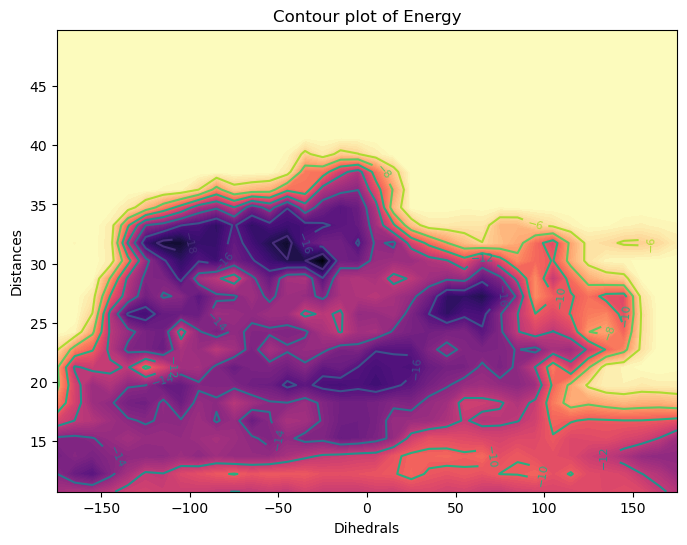

In [15]:
X_2D = dihedrals.reshape(-1, len(set(distances)))
Y_2D = distances.reshape(len(set(dihedrals)), -1)
Z_energy_2D = energy.reshape(len(set(dihedrals)), len(set(distances)))

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X_2D, Y_2D, Z_energy_2D)
contourf = plt.contourf(X_2D, Y_2D, Z_energy_2D, levels=100, cmap='magma')
# Adding labels
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('Dihedrals')
plt.ylabel('Distances')
plt.title('Contour plot of Energy')


# Display the plot
plt.show()